In [1]:
#Distance calcualtion between DAP12 chain A or B and TREM2
import MDAnalysis as mda
import numpy as np
import MDAnalysis.analysis.distances
import matplotlib.pyplot as plt
from numpy import linalg as LA
import MDAnalysis.analysis.rdf as rdf_calc
import seaborn as sns
import pandas as pd
from tqdm.auto import tqdm

In [2]:
u = mda.Universe("/Users/k20098771/Data/2023/CGtoAA/AF_CGtoAA_200us_step6_6.gro", "/Users/k20098771/Data/2023/CGtoAA/AF_CGtoAA_200us_300ns_nojump_center.xtc")
protein = u.select_atoms('protein')
print('There are {} residues in the protein'.format(len(protein.residues)))
#protein residues

There are 112 residues in the protein


In [3]:
u_1000 = u.trajectory[3500:4500]
len(u_1000)
time=[]
for ts in tqdm(u_1000):
    time.append(u.trajectory.time)
time=np.array(time)
len(time)

  0%|          | 0/1000 [00:00<?, ?it/s]

1000

In [4]:
#Select DAP12 and TREM2
DAP12_A = u.select_atoms('index 0:495 and name CA') #DAP12 chain A
DAP12_B = u.select_atoms('index 496:991 and name CA') #DAP12 chain B
TREM2 = u.select_atoms('index 992:1716 and name CA') #TREM2
print(np.unique(DAP12_A.resids))
print(np.unique(DAP12_B.resids))
print(np.unique(TREM2.resids))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


In [5]:
'''
#Contact code
contacts = np.zeros((len(np.unique(DAP12_A.resids)), len(np.unique(DAP12_B.resids))))
sub = np.unique(DAP12_B.resids)[0]
sub_a = np.unique(DAP12_A.resids)[0]
for ts in tqdm(u_1000):
    for i in (np.unique(DAP12_A.resids)):  
        a = DAP12_A.select_atoms('resid '+str(i))    
        for k in (np.unique(DAP12_B.resids)):      
            b = DAP12_B.select_atoms('resid '+str(k))      
            if MDAnalysis.analysis.distances.distance_array(a.center_of_mass(), b.center_of_mass(), box=[u.dimensions[0], u.dimensions[1], u.dimensions[2], u.dimensions[3], u.dimensions[4], u.dimensions[5]]) < 9.0:           
                contacts[i-sub_a,k-sub] += 1
'''

"\n#Contact code\ncontacts = np.zeros((len(np.unique(DAP12_A.resids)), len(np.unique(DAP12_B.resids))))\nsub = np.unique(DAP12_B.resids)[0]\nsub_a = np.unique(DAP12_A.resids)[0]\nfor ts in tqdm(u_1000):\n    for i in (np.unique(DAP12_A.resids)):  \n        a = DAP12_A.select_atoms('resid '+str(i))    \n        for k in (np.unique(DAP12_B.resids)):      \n            b = DAP12_B.select_atoms('resid '+str(k))      \n            if MDAnalysis.analysis.distances.distance_array(a.center_of_mass(), b.center_of_mass(), box=[u.dimensions[0], u.dimensions[1], u.dimensions[2], u.dimensions[3], u.dimensions[4], u.dimensions[5]]) < 9.0:           \n                contacts[i-sub_a,k-sub] += 1\n"

In [6]:
'''
#Plot
string_array_columns=[]
string_array_rows=[]
for i in range(len(DAP12_B.residues)):
    string_array_columns.append(str(DAP12_B.residues[i]))   
for i in range(len(DAP12_A.residues)):
    string_array_rows.append(str(DAP12_A.residues[i]))
#np.save(f"{results}/string_array_rows.npy", string_array_rows)
#np.save(f"{results}/string_array_columns.npy", string_array_columns)
print(np.shape(string_array_columns))
#create a pandas dataframe
df = pd.DataFrame(contacts, columns=[string_array_columns])

xticks=string_array_columns
yticks=string_array_rows

print(xticks)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df, xticklabels=xticks, yticklabels=yticks, cmap="Blues", ax=ax, linewidths=.5)

ax.invert_yaxis() 

plt.xlabel("DAP12 Chain A")
plt.ylabel("DAP12 Chian B")
plt.title("Dimer number of contacts")
#plt.legend(loc='upper right', bbox_to_anchor=(2.2, 1))
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.sans-serif'] = 'Josefin Sans'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

#color of DAP12 motifs DxxxT
plt.gca().get_xticklabels()[15].set_color("navy")
plt.gca().get_xticklabels()[16].set_color("navy")
plt.gca().get_xticklabels()[17].set_color("navy")
plt.gca().get_xticklabels()[18].set_color("navy")
plt.gca().get_xticklabels()[19].set_color("navy")
plt.gca().get_yticklabels()[15].set_color("navy")
plt.gca().get_yticklabels()[16].set_color("navy")
plt.gca().get_yticklabels()[17].set_color("navy")
plt.gca().get_yticklabels()[18].set_color("navy")
plt.gca().get_yticklabels()[19].set_color("navy")
plt.show()
'''

'\n#Plot\nstring_array_columns=[]\nstring_array_rows=[]\nfor i in range(len(DAP12_B.residues)):\n    string_array_columns.append(str(DAP12_B.residues[i]))   \nfor i in range(len(DAP12_A.residues)):\n    string_array_rows.append(str(DAP12_A.residues[i]))\n#np.save(f"{results}/string_array_rows.npy", string_array_rows)\n#np.save(f"{results}/string_array_columns.npy", string_array_columns)\nprint(np.shape(string_array_columns))\n#create a pandas dataframe\ndf = pd.DataFrame(contacts, columns=[string_array_columns])\n\nxticks=string_array_columns\nyticks=string_array_rows\n\nprint(xticks)\nfig, ax = plt.subplots(figsize=(15,15))\nsns.heatmap(df, xticklabels=xticks, yticklabels=yticks, cmap="Blues", ax=ax, linewidths=.5)\n\nax.invert_yaxis() \n\nplt.xlabel("DAP12 Chain A")\nplt.ylabel("DAP12 Chian B")\nplt.title("Dimer number of contacts")\n#plt.legend(loc=\'upper right\', bbox_to_anchor=(2.2, 1))\nplt.rcParams[\'font.family\'] = \'serif\'\n#plt.rcParams[\'font.sans-serif\'] = \'Josefin San

In [7]:
#Contact code
contactsA = np.zeros((len(np.unique(DAP12_A.resids)), len(np.unique(TREM2.resids))))
sub = np.unique(TREM2.resids)[0]
sub_a = np.unique(DAP12_A.resids)[0]
for ts in tqdm(u_1000):
    for i in (np.unique(DAP12_A.resids)):  
        a = DAP12_A.select_atoms('resid '+str(i))    
        for k in (np.unique(TREM2.resids)):      
            b = TREM2.select_atoms('resid '+str(k))      
            if MDAnalysis.analysis.distances.distance_array(a.center_of_mass(), b.center_of_mass(), box=[u.dimensions[0], u.dimensions[1], u.dimensions[2], u.dimensions[3], u.dimensions[4], u.dimensions[5]]) < 11.0:           
                contactsA[i-sub_a,k-sub] += 1

  0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
probA=contactsA/len(u_1000)

In [9]:
chartA=np.where(probA>=0.9)
import pandas as pd
df = pd.DataFrame(chartA)
index=["TREM2", "DAP12"]
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3,8,12,12,15,16,16,19,19,19,19,19,19,20,20,20,20,22,22,22,22,23,23,23,23,23,23,23,23,23,24,24,24,24,25,25,25,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,28,28,28,29,29,30,30,30,30,30,31,31
1,3,4,5,6,2,3,4,5,6,7,12,13,14,5,13,14,13,14,17,18,21,25,25,25,29,25,28,29,30,32,33,29,32,33,36,29,32,33,36,29,30,31,32,33,34,35,36,37,32,33,36,37,33,36,37,32,33,34,35,36,37,38,32,33,34,35,36,37,38,39,36,37,38,37,38,36,37,38,39,40,37,38


In [10]:
df = pd.DataFrame({'TREM2': chartA[1]+1})
df['DAP12_Chain A'] = chartA[0]+1 # Add a column 'D' with values from chartA[1]
#df.index = range(1, len(df) + 1)
print(df)

    TREM2  DAP12_Chain A
0       4              1
1       5              1
2       6              1
3       7              1
4       3              2
5       4              2
6       5              2
7       6              2
8       7              2
9       8              2
10     13              2
11     14              2
12     15              2
13      6              3
14     14              3
15     15              3
16     14              4
17     15              4
18     18              4
19     19              9
20     22             13
21     26             13
22     26             16
23     26             17
24     30             17
25     26             20
26     29             20
27     30             20
28     31             20
29     33             20
30     34             20
31     30             21
32     33             21
33     34             21
34     37             21
35     30             23
36     33             23
37     34             23
38     37             23


In [11]:
# from pathlib import Path  
# filepath = Path('/Users/k20098771/Data/Figures/AF_CGtoAA_ChainA_probability_plot_01.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# df.to_csv(filepath) 

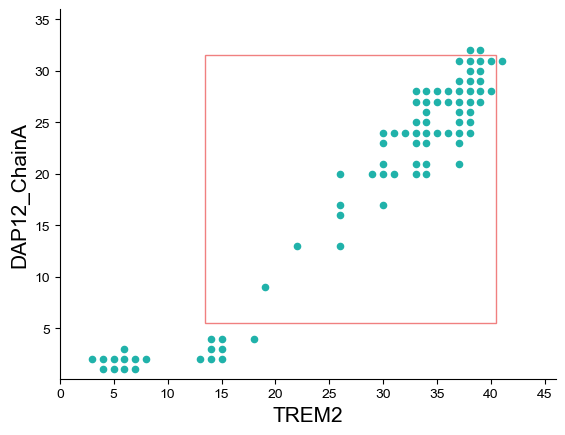

In [12]:
import matplotlib.patches as patches

df = pd.DataFrame({'DAP12_ChainA': chartA[0]+1})
df['TREM2'] = chartA[1]+1

# Plotting the DataFrame
ax = df.plot(x='TREM2', y='DAP12_ChainA', kind='scatter', color='lightseagreen')
ax.set_xlabel('TREM2', fontsize=15, fontname='Arial')
ax.set_ylabel('DAP12_ChainA', fontsize=15, fontname='Arial')

# Add the rectangle
#rect = patches.Rectangle((25.5, 16.5), width=1, height=5, fill=False, edgecolor='red') #DxxxT
#ax.add_patch(rect)

rect_2 = patches.Rectangle((13.5, 5.5), width=27, height=26, fill=False, edgecolor='lightcoral')
ax.add_patch(rect_2)

# Adjusting the x-axis ticks
x_ticks = np.arange(0, 47, 5)
y_ticks = np.arange(0, 37, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
plt.xlim([0,46])
plt.ylim([0.1,36])

# Changing the font name of x-axis and y-axis tick labels
ax.set_xticklabels(ax.get_xticks(), fontsize=10, fontname='Arial')
ax.set_yticklabels(ax.get_yticks(), fontsize=10, fontname='Arial')

ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines

# Saving the plot as an image file
#plt.savefig("/Users/k20098771/Data/Figures/AF_CGtoAA_ChainA_probability_plot_01.eps", dpi=1200, format='eps')


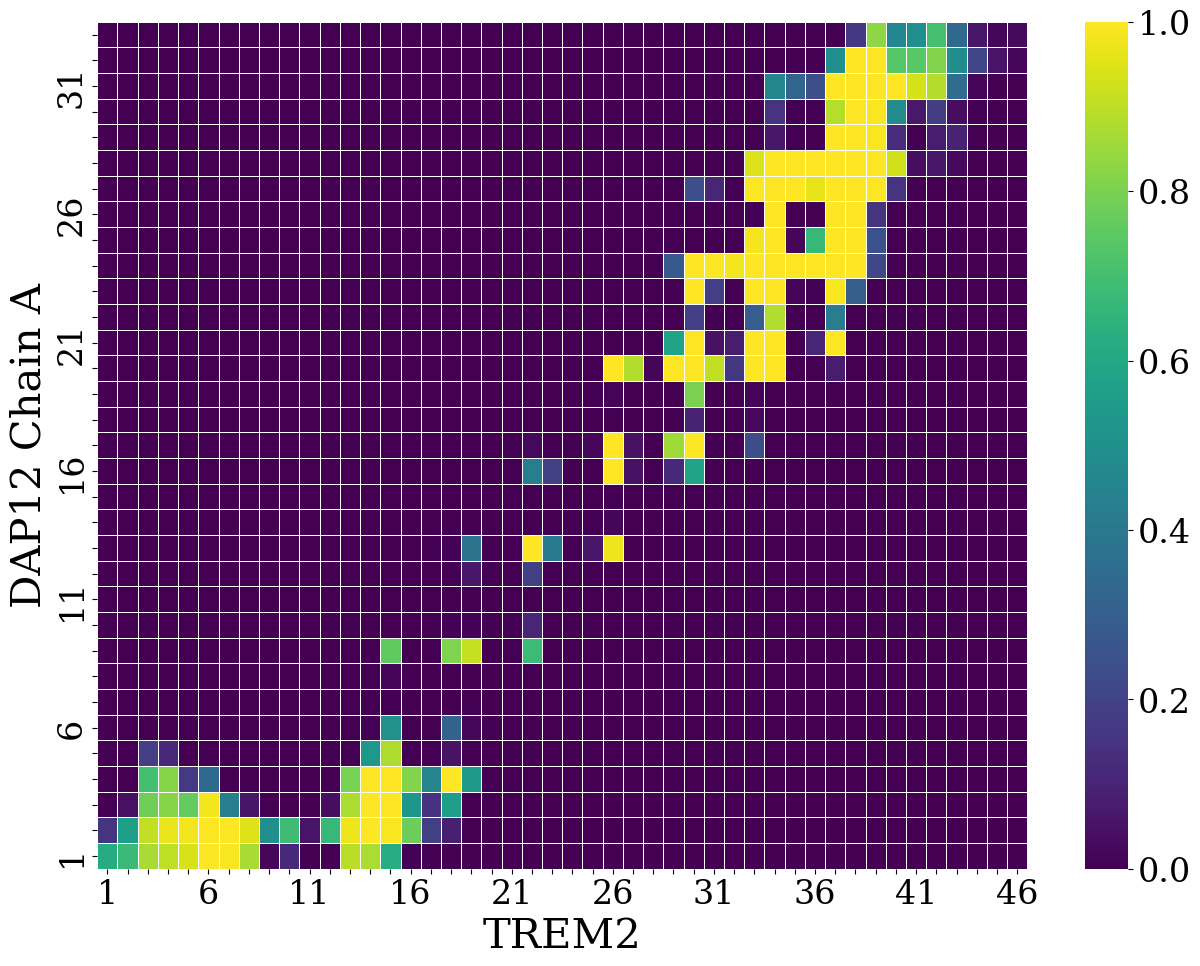

In [26]:
string_array_columns=[]
string_array_rows=[]
for i in range(len(TREM2.residues)):
    string_array_columns.append(i+1)  
for i in range(len(DAP12_A.residues)):
    string_array_rows.append(i+1)

# Generate xstick and ystick labels every 5 values
xticks = [str(i) if i % 5 == 1 else '' for i in range(1, len(TREM2.residues) + 1)]
yticks = [str(i) if i % 5 == 1 else '' for i in range(1, len(DAP12_A.residues) + 1)]


# Create a pandas DataFrame with the appropriate shape
df = pd.DataFrame(probA, columns=range(1, len(TREM2.residues) + 1), index=range(1, len(DAP12_A.residues) + 1))

fig, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(df, xticklabels=xticks, yticklabels=yticks, cmap="viridis", ax=ax, linewidths=0.5)
ax.invert_yaxis()

# # Set color and font weight for specific labels
# plt.gca().get_yticklabels()[3].set_color("navy")  # Change the index as needed
# plt.gca().get_xticklabels()[5].set_color("darkmagenta")  # Change the index as needed
# plt.gca().get_yticklabels()[3].set_fontweight('bold')
# plt.gca().get_xticklabels()[5].set_fontweight('bold')

plt.xlabel("TREM2")
plt.ylabel("DAP12 Chain A")
#plt.title("Dimer number of contacts")
#plt.legend(loc='upper right', bbox_to_anchor=(2.2, 1))
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.sans-serif'] = 'Josefin Sans'
plt.rcParams['font.size'] = 28
# plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 32

# Saving the plot as an image file
plt.savefig("/Users/k20098771/Data/Figures/AF_CGtoAA_ChainA_probability_plot_02.png", dpi=800, format='png')

plt.show()

In [14]:
#Contact code
contactsB = np.zeros((len(np.unique(DAP12_B.resids)), len(np.unique(TREM2.resids))))
sub = np.unique(TREM2.resids)[0]
sub_a = np.unique(DAP12_B.resids)[0]
for ts in tqdm(u_1000):
    for i in (np.unique(DAP12_B.resids)):  
        a = DAP12_B.select_atoms('resid '+str(i))    
        for k in (np.unique(TREM2.resids)):      
            b = TREM2.select_atoms('resid '+str(k))      
            if MDAnalysis.analysis.distances.distance_array(a.center_of_mass(), b.center_of_mass(), box=[u.dimensions[0], u.dimensions[1], u.dimensions[2], u.dimensions[3], u.dimensions[4], u.dimensions[5]]) < 11.0:           
                contactsB[i-sub_a,k-sub] += 1

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
probB=contactsB/len(u_1000)

In [16]:
chartB=np.where(probB>=0.9)
import pandas as pd
df = pd.DataFrame(chartB)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,2,2,3,3,3,4,15,15,19,19,19,22,22,22,23,23,23,26,26,26,26,27,27,27,27,30,30,30,30,30,31,31,31,32,32
1,2,14,1,2,3,2,22,25,25,26,29,26,29,30,29,30,33,30,33,34,37,33,34,37,38,33,34,37,38,39,37,38,39,39,40


In [17]:
df = pd.DataFrame({'TREM2': chartB[1]+1})
df['DAP12_Chain A'] = chartB[0]+1 # Add a column 'D' with values from chartA[1]
#df.index = range(1, len(df) + 1)
print(df)

    TREM2  DAP12_Chain A
0       3              3
1      15              3
2       2              4
3       3              4
4       4              4
5       3              5
6      23             16
7      26             16
8      26             20
9      27             20
10     30             20
11     27             23
12     30             23
13     31             23
14     30             24
15     31             24
16     34             24
17     31             27
18     34             27
19     35             27
20     38             27
21     34             28
22     35             28
23     38             28
24     39             28
25     34             31
26     35             31
27     38             31
28     39             31
29     40             31
30     38             32
31     39             32
32     40             32
33     40             33
34     41             33


In [18]:
# from pathlib import Path  
# #filepath = Path('/Users/k20098771/Data/Figures/AF_CGtoAA_ChainB_probability_plot_01.csv')  
# df.to_csv(filepath) 

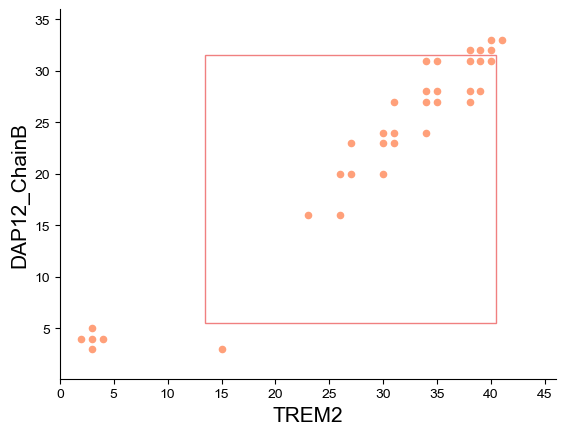

In [19]:
import matplotlib.patches as patches

df = pd.DataFrame({'DAP12_ChainB': chartB[0]+1})
df['TREM2'] = chartB[1]+1

# Plotting the DataFrame
ax = df.plot(x='TREM2', y='DAP12_ChainB', kind='scatter', color='lightsalmon')
ax.set_xlabel('TREM2', fontsize=15, fontname='Arial')
ax.set_ylabel('DAP12_ChainB', fontsize=15, fontname='Arial')

# Add the rectangle
rect_2 = patches.Rectangle((13.5, 5.5), width=27, height=26, fill=False, edgecolor='lightcoral')
ax.add_patch(rect_2)


# Adjusting the x-axis ticks
x_ticks = np.arange(0, 47, 5)
y_ticks = np.arange(0, 37, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
plt.xlim([0,46])
plt.ylim([0.1,36])

# Changing the font name of x-axis and y-axis tick labels
ax.set_xticklabels(ax.get_xticks(), fontsize=10, fontname='Arial')
ax.set_yticklabels(ax.get_yticks(), fontsize=10, fontname='Arial')

ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines

# Saving the plot as an image file
#plt.savefig("/Users/k20098771/Data/Figures/AF_CGtoAA_ChainB_probability_plot_01.eps", dpi=1200, format='eps')

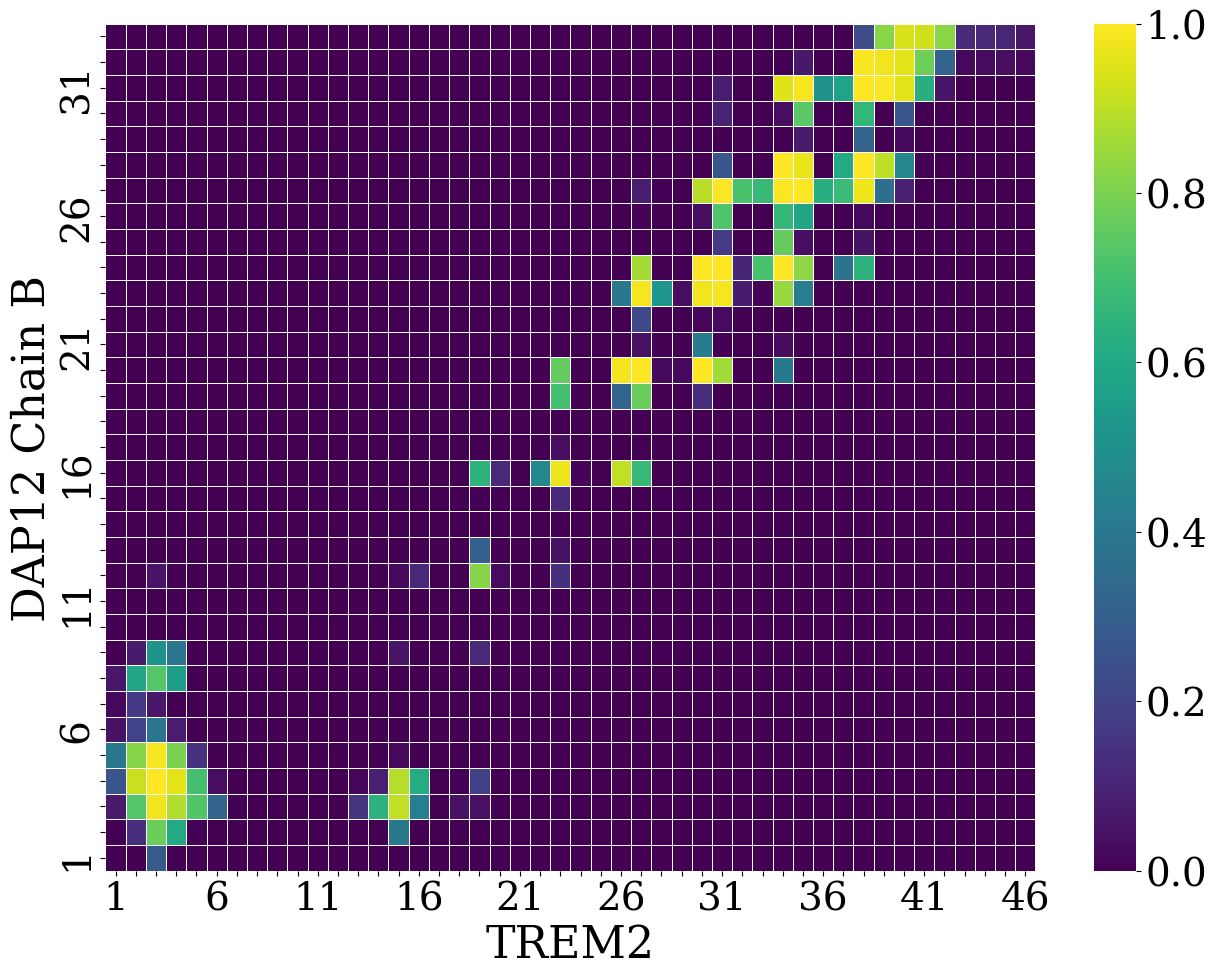

In [27]:
string_array_columns=[]
string_array_rows=[]
for i in range(len(TREM2.residues)):
    string_array_columns.append(i+1)  
for i in range(len(DAP12_B.residues)):
    string_array_rows.append(i+1)

# Generate xstick and ystick labels every 5 values
xticks = [str(i) if i % 5 == 1 else '' for i in range(1, len(TREM2.residues) + 1)]
yticks = [str(i) if i % 5 == 1 else '' for i in range(1, len(DAP12_A.residues) + 1)]


# Create a pandas DataFrame with the appropriate shape
df = pd.DataFrame(probB, columns=range(1, len(TREM2.residues) + 1), index=range(1, len(DAP12_A.residues) + 1))

fig, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(df, xticklabels=xticks, yticklabels=yticks, cmap="viridis", ax=ax, linewidths=0.5)
ax.invert_yaxis()

# # Set color and font weight for specific labels
# plt.gca().get_yticklabels()[3].set_color("navy")  # Change the index as needed
# plt.gca().get_xticklabels()[5].set_color("darkmagenta")  # Change the index as needed
# plt.gca().get_yticklabels()[3].set_fontweight('bold')
# plt.gca().get_xticklabels()[5].set_fontweight('bold')

plt.xlabel("TREM2")
plt.ylabel("DAP12 Chain B")
#plt.title("Dimer number of contacts")
#plt.legend(loc='upper right', bbox_to_anchor=(2.2, 1))
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.sans-serif'] = 'Josefin Sans'
plt.rcParams['font.size'] = 28
# plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 32    
    
plt.savefig("/Users/k20098771/Data/Figures/AF_CGtoAA_ChainB_probability_plot_02.png", dpi=800, format='png')

plt.show()